# RITA Flight Data Exploration
## Objective
This purpose of this notebook is to explore the flight data obtained from [stat-computing.org](http://stat-computing.org/dataexpo/2009/the-data.html) in search of an interesting visualization for my final Data Analyst Nanodegree project.

In [147]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

The data is separated by year. For simple exploration a single year will be chosen. 1988 was picked because it was one of the smallests data files that contained a full year of data.

In [2]:
df = pd.read_csv('data/1988.csv.bz2', compression='bz2')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202096 entries, 0 to 5202095
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime       int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     float64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(16), int64(10), object(3)
memory usage: 1.1+ GB


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
348582,1988,1,30,6,1810.0,1811,1852.0,1855,AA,436,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2776814,1988,7,13,3,1614.0,1610,1753.0,1745,NW,1458,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2350767,1988,6,4,6,1508.0,1510,1539.0,1544,PI,28,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1038000,1988,3,2,3,1413.0,1410,1449.0,1445,PI,77,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4166398,1988,10,15,6,1844.0,1844,1949.0,1957,DL,1405,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3179705,1988,8,29,1,755.0,755,905.0,905,HP,873,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
420775,1988,1,12,2,800.0,800,948.0,940,AS,191,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3633035,1988,9,17,6,1720.0,1720,1906.0,1916,NW,459,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1316222,1988,4,2,6,2349.0,2331,19.0,8,TW,273,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5157755,1988,12,2,5,920.0,920,1039.0,1035,AS,158,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


A single year uses 1.1 GB of data. This can be alleviated by dropping unused columns and aggregating interesting information (e.g. computing averages by month and year).

In [3]:
# Take a percentage sample to reduce the size
df = df.sample(frac=.01)

## Which Airlines have the longest delays

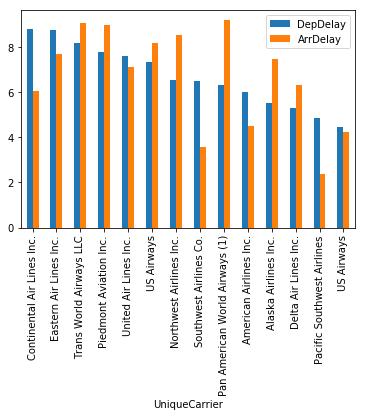

In [145]:
carriers = pd.read_csv('data/carriers.csv')
carrier_dict = dict(carriers.values)
df.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}) \
            .rename(index=carrier_dict) \
            .sort_values('DepDelay', ascending=False).plot.bar()
plt.show()

Continental was the worste airline for departures, while PanAm was the worst for arrivals.
It looks like some airlines have longer departure delays than arrival delays. 
### What is the relationship between arrival and departure delays?

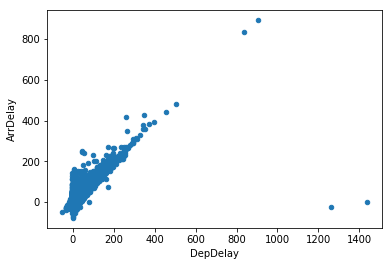

In [5]:
df.plot.scatter(x='DepDelay', y='ArrDelay')
plt.show()

In [6]:
outliers = (((df.DepDelay - df.DepDelay.mean()).abs() > df.DepDelay.std()*3) | 
            ((df.ArrDelay - df.ArrDelay.mean()).abs() > df.ArrDelay.std()*3))

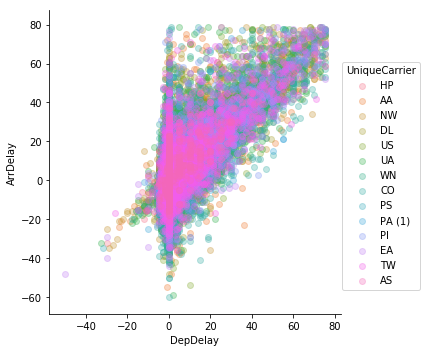

In [7]:
sns.lmplot('DepDelay', 'ArrDelay', data=df[~outliers],
           fit_reg=False, hue='UniqueCarrier', scatter_kws={'alpha':0.3})
plt.show()

Even after trimming outliers and adding alpha, this chart is too busy.

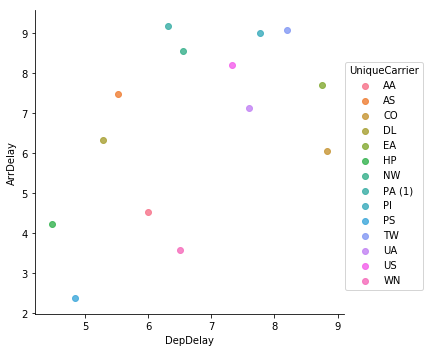

In [8]:
carrier_averages = df.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).reset_index()
sns.lmplot('DepDelay', 'ArrDelay', data=carrier_averages,
           fit_reg=False, hue='UniqueCarrier', )
plt.show()

After aggregating by airline it becomes too sparse and loses meaning.

## Delays by month

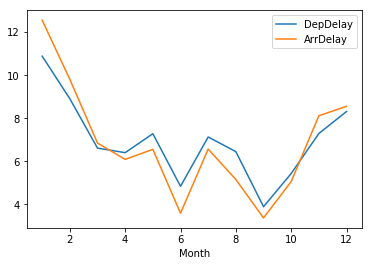

In [9]:
df.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.line()
plt.show()

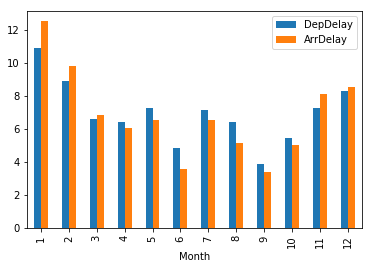

In [10]:
df.groupby('Month').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar()
plt.show()

September was the best month to fly, January the worst.

## What is the worst time of day to travel?

In [11]:
df['CRSDepHour'] = pd.cut(df.CRSDepTime, list(range(0, 2500, 100)))

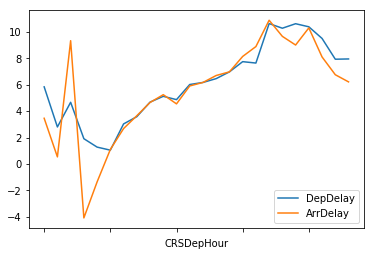

In [12]:
df.groupby('CRSDepHour').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot()
plt.show()

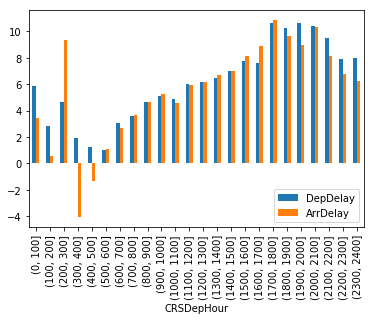

In [13]:
df.groupby('CRSDepHour').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar()
plt.show()

Early morning is the best time to fly, with the delays increasing as the day goes on and peaking around 6pm.

### Distribution of Delays

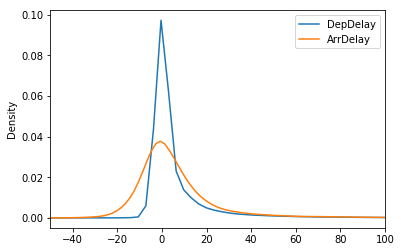

In [14]:
df.loc[:,['DepDelay', 'ArrDelay']].plot.density(xlim=(-50,100))

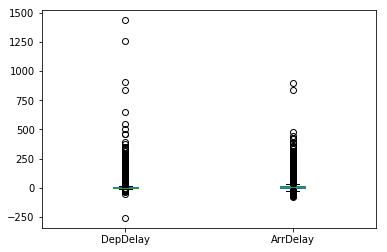

In [15]:
df.loc[:,['DepDelay', 'ArrDelay']].plot.box()

## Data prepping
Carrier names are going to need some munging.

In [111]:
carriers.loc[carriers.index.intersection(carriers.Description.str.len().nlargest(10).index)]

,Code,Description
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"
60,6R,Aerounion Aerotransporte de Carga Union SA de CV
262,B4,Globespan Airways Limited d/b/a Flyglobespan
642,HP,America West Airlines Inc. (Merged with US Air...
690,JAG,JetAlliance Flugbetriebs d/b/a JAF Airservice
720,K3,Venture Travel LLC d/b/a Taquan Air Service
850,MRQ,"National Air Cargo Group, Inc.d/b/a Murray Air"
1054,QT,Transportes Aereos Mercantiles Panamericanos S.A
1308,US,US Airways Inc. (Merged with America West 9/05...
1460,YAT,"Friendship Airways, Inc. d/b/a Yellow Air Taxi"


In [143]:
# For simplicity, combine US Air and Amercia West
carriers.loc[[642, 1308], 'Description'] = 'US Airways'

# Drop doing business as (d/b/a) names
drop_dbas = lambda x: str.split(x, 'd/b/a')[0].strip()
carriers['Description'] = carriers['Description'].apply(drop_dbas)

In [146]:
carriers.loc[carriers.index.intersection(carriers.Description.str.len().nlargest(10).index)]

,Code,Description
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
60,6R,Aerounion Aerotransporte de Carga Union SA de CV
270,BAQ,Aero Rentas De Coahuila S.A. De C.V.
279,BDQ,Aerotaxis De Aguascalientes S.A. De C.V.
294,BIQ,Servicios Aeronauticos Z S.A. De C.V.
302,BNQ,Netjets Large Aircraft Company L.L.C.
323,C5,"Commutair Aka Champlain Enterprises, Inc."
1031,PU,Primeras Lineas Uruguays For International
1054,QT,Transportes Aereos Mercantiles Panamericanos S.A
1459,Y8,Yangtze River Express Airlines Company


In [154]:
df['UniqueCarrier'] = df['UniqueCarrier'].map(dict(carriers.values))

In [155]:
df.UniqueCarrier.head()

1866959                 US Airways
130858                  US Airways
1230115     American Airlines Inc.
2769791    Northwest Airlines Inc.
2867455       Delta Air Lines Inc.
Name: UniqueCarrier, dtype: object

In [148]:
with open('data/carrier_dict.pkl', 'wb') as file:
    pickle.dump(dict(carriers.values), file)